# Stock Predicition Trend using Machine Learning

In this notebook, I will show you hwo to do a stock prediction using Machine Learning and Keras. I learned how to do the machine learning stuff from myself, but I also have some reference on `https://www.youtube.com/watch?v=QIUxPv5PJOY` by Computer Science to make it. I will implement the codes from the video and make some modifications. Just contact me via email (denzeledanbanget@gmail.com) if there are some issues happened.

## Set up the environment and Libraries

In [4]:
%pip install tensorflow
%pip install keras
%pip install yfinance

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.0 MB 1.9 MB/s eta 0:03:21
   ---------------------------------------- 0.2/385.0 MB 2.9 MB/s eta 0:02:14
   ---------------------------------------- 0.5/385.0 MB 4.4 MB/s eta 0:01:28
   ---------------------------------------- 0.8/385.0 MB 5.3 MB/s eta 0:01:13
   ---------------------------------------- 0.9/385.0 MB 4.2 MB/s eta 0:01:33
   ---------------------------------------- 1.5/385.0 MB 6.3 MB/s eta 0:01:02
   ---------------------------------------- 2.4/385.0 MB 7.5 MB/s eta 0:00:52
   ---------------------------------------- 2.9/385.0 MB 7.9 MB/s eta 0:00:49
   ---------------------------------------- 3.3/385.0 MB 8.5 MB/s eta 0:00:46
   ---------------------------------------- 3.8/385.0 MB 8.4 MB/s eta 0:00:46
   ------------


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install numpy

import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import datetime
import tensorflow as tf
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock quote

stock = 'AMZN'
# Define the date range
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2024, 8, 8)

amzn = yf.download(stock, start=start, end=end)

amzn

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2024-08-01,189.289993,190.600006,181.869995,184.070007,184.070007,70435600
2024-08-02,166.750000,168.770004,160.550003,167.899994,167.899994,141448400
2024-08-05,154.210007,162.960007,151.610001,161.020004,161.020004,83149400


If you see it clearly the starting date is not first of January, it may happen because on first of Jnauary there will not be a record.

In [4]:
# Get the number of rows and columns in the data set
amzn.shape

(3169, 6)

Text(0, 0.5, 'Close Price USD ($)')

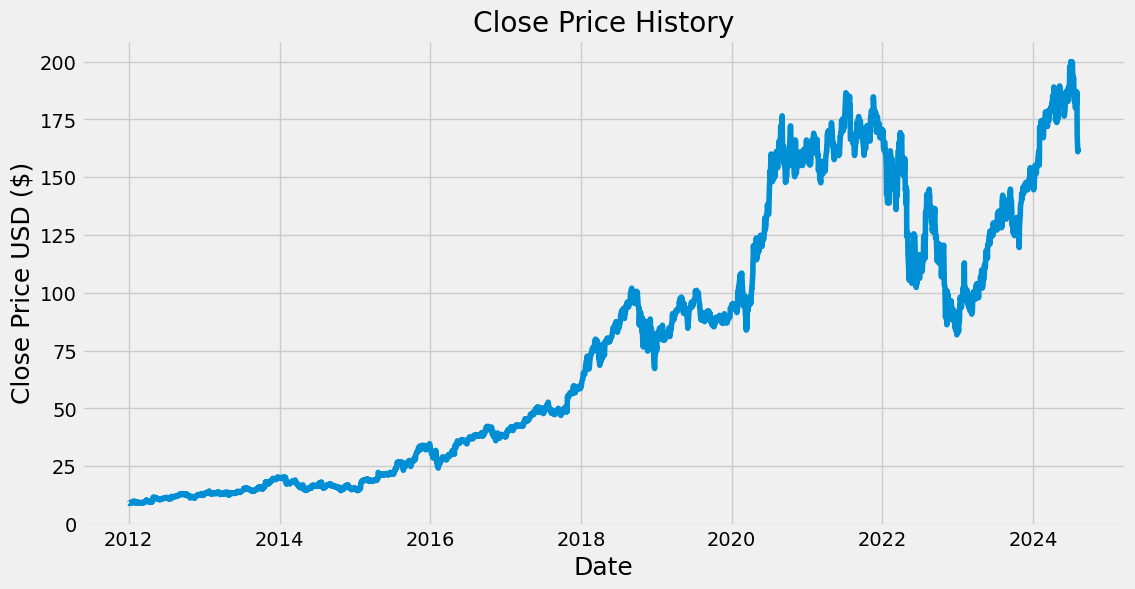

In [5]:
#Visualize the closing price history
plt.figure(figsize=(12,6))
plt.title('Close Price History')
plt.plot(amzn['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

Text(0, 0.5, 'Price in USD ($)')

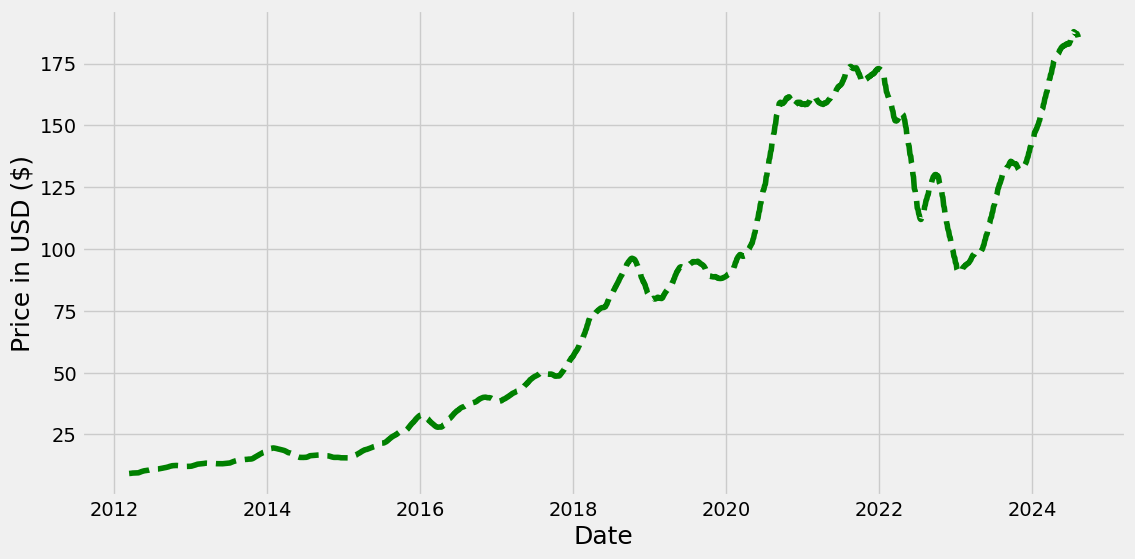

In [6]:
# Adding Moving Average of 50 days window

amzn['MA50'] = amzn['Close'].rolling(window = 50).mean()
plt.figure(figsize=(12,6))
plt.plot(amzn['MA50'], 'g--', label = 'MA50')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price in USD ($)', fontsize = 18)

To maintain a focused analysis on the Closing Price, as outlined in the Quantitative Analysis for Price and Daily Returns, I will create a new dataset consisting solely of the Close column.

Instead of predicting the exact prices, my aim is to understand the trend and movement of Amazon stock. For this purpose, I will be using the MA50 (50-Day Moving Average) as the target column for prediction. The rationale behind this choice is that the MA50 helps reduce noise, potentially leading to better predictive performance. However, if your goal is to predict the exact price on a specific day, I would advise against using MA50, as it naturally smooths out the graph, reducing its sensitivity to recent market changes. MA50 is more suited for identifying lagging indicators, trends, and the broader picture over time.

In [7]:
data = amzn.filter(['MA50'])
# drop the missing values, since the first 50 days will not have MA50
cleaned_data = data.dropna()
# converting the dataframe to numpy array
dataset = cleaned_data.values
# count the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

print(training_data_len)

2496


In [8]:
# As we know in the Neural Network, it is a good practice to scale the data before giving it to the model
# Here, we are using MinMaxScaler from sklearn library to scale the data between 0 and 1
# MinMaxScaler is a scale that transforms the data in the range [0,1] or [-1,1] and we will use [0,1] in this case

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00000000e+00],
       [3.02204384e-05],
       [7.24170369e-05],
       ...,
       [9.91457706e-01],
       [9.89317654e-01],
       [9.87305201e-01]])

In [9]:
#sanity check for the scaled data
scaled_data.min(), scaled_data.max()


(0.0, 1.0)

In [10]:
# finding the location of the maximum and minimum values in the scaled data
min_index = np.where(scaled_data == scaled_data.min())
max_index = np.where(scaled_data == scaled_data.max())

print(min_index)
print(max_index)

(array([0], dtype=int64), array([0], dtype=int64))
(array([3104], dtype=int64), array([0], dtype=int64))


So, from the scaled data that we have, there are two extreme points, which are the 1st value which is the minimum point, and the 3104th value is the maximum or the peak of this Moving Average Value.

## Create the Training Data Set

In [11]:
# Create the training data set
train_data = scaled_data[0:training_data_len, :]

# split the data into x_train and y_train data sets
x_train = []
y_train = [] # the target variable

for i in range (50, len(train_data)):
    x_train.append(train_data[i-50:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 51:
        print(x_train) # the result is a list of lists that we will use for training and predicting the model
        print(y_train) # the result is a list that we will use for training and predicting the model
        print("####################")
        
# in each pass through the loop, we are appending the previous 50 values to x_train and the 51st value to y_train

[array([0.00000000e+00, 3.02204384e-05, 7.24170369e-05, 1.16684328e-04,
       1.71081032e-04, 2.44785167e-04, 3.17873720e-04, 4.08199117e-04,
       5.58965285e-04, 7.10179236e-04, 8.19308348e-04, 9.04205262e-04,
       9.49311974e-04, 9.89158108e-04, 1.06510084e-03, 1.10421942e-03,
       1.14109940e-03, 1.13298464e-03, 1.08603108e-03, 1.06263830e-03,
       1.04165192e-03, 1.09201932e-03, 1.11317349e-03, 1.11714697e-03,
       1.16152624e-03, 1.20019714e-03, 1.22538073e-03, 1.24362490e-03,
       1.27043151e-03, 1.28626918e-03, 1.31251624e-03, 1.54969026e-03,
       1.84053354e-03, 2.10658485e-03, 2.37515454e-03, 2.64864900e-03,
       2.90104521e-03, 3.15864606e-03, 3.41255321e-03, 3.63181897e-03,
       3.89484831e-03, 4.16145928e-03, 4.40562876e-03, 4.65259648e-03,
       4.89307247e-03, 5.08665081e-03, 5.23333164e-03, 5.42243300e-03,
       5.60118101e-03, 5.78412634e-03])]
[0.005968694571005247]
####################
[array([0.00000000e+00, 3.02204384e-05, 7.24170369e-05, 1.1668

In [12]:
# convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
# Reshaping the data is important for LSTM Model
# LSTM model expects the input to be 3D in the form of number of samples, number of time steps, and number of features, while now we only have 2D data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2446, 50, 1)

Here, I want to compare two LSTM models that use different optimizers and Loss Function, I want to compare which model is working better.

In [41]:
# Build the LSTM Model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(60, return_sequences=True, input_shape = (x_train.shape[1], 1)),
    tf.keras.layers.LSTM(60, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

In [50]:
# We are going to use Mean Squared Error as the loss function and SGD as the optimizer to compile the model
# Mean Squared Error is the average of the squared differences between the predicted and actual values

# Set the Optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.045, momentum=0.9)

# Compile the model
model.compile(loss = tf.keras.losses.Huber(), optimizer = optimizer, metrics = ["mae"])


In [51]:
# Train the model

model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2446/2446 ━━━━━━━━━━━━━━━━━━━━ 50s 19ms/step - loss: 2.8108e-05 - mae: 0.0057


In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(60, return_sequences=True, input_shape = (x_train.shape[1], 1)),
    tf.keras.layers.LSTM(60, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')
model2.fit(x_train, y_train, batch_size = 1, epochs = 1)

2446/2446 ━━━━━━━━━━━━━━━━━━━━ 50s 19ms/step - loss: 0.0021


From our observations after one epoch, we found that the Adam optimizer combined with MSE loss performed better, achieving a loss of just 0.0021. This outcome is likely because Huber loss is typically more effective when dealing with a significant number of outliers, which can otherwise skew the loss. However, in the case of Amazon stock data, the outliers are not as prevalent as anticipated, making MSE a more suitable choice due to its ability to penalize large errors, which is advantageous during training.

In contrast, using SGD (Stochastic Gradient Descent) requires extensive hyperparameter tuning, particularly of the learning rate, which involves a considerable amount of trial and error. Adam, being an Adaptive Moment Estimation optimizer, adapts the learning rate and is versatile across a wide range of problems. While experimenting with SGD, I tested several learning rates (e.g., 0.1, 0.01, 0.05, 0.04, 2e-6, etc.), but the loss remained more than double that achieved with Adam. Therefore, it's not that Adam necessarily outperforms SGD with Huber loss universally, but in this specific case, Adam with MSE is clearly the better choice for executing predictions.

Hence, we are going to use the **second model**.

In [52]:
# Create the testing data set
# Create a new array containing scaled values from index 2446 to 3045
test_data = scaled_data[training_data_len - 50:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i, 0])

In [53]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [54]:
# Reshape the data like before
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [55]:
# Get the models predicted price values
predictions = model2.predict(x_test)
# unscaling the values, so that we can compare the predicted values with the actual values
predictions = scaler.inverse_transform(predictions)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [56]:
# Get the Root Mean Squared Error (RMSE) to evaluat the model performance
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

0.6261025443443887

Seeing the evaluation of the model, this indicates that the model is pretty good, since the RMSE is under 4 which is a very small number. Thus, our optimizers and model works well which is nice. Now, we are going to plit the data and the prediciton itself, we want to see how close it is with the real data.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15280\3201430040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


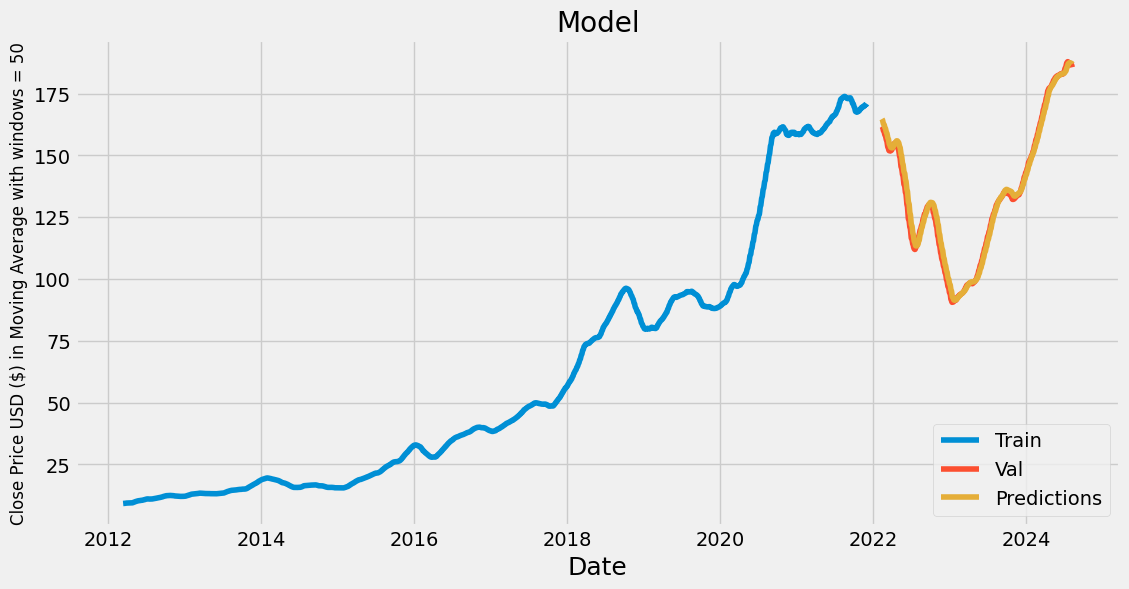

In [57]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len+49:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(12,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($) in Moving Average with windows = 50', fontsize=12)
plt.plot(train['MA50'])
plt.plot(valid[['MA50', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [58]:
# Show the valid and predicted MA50 prices

valid

,MA50,Predictions
Date,,
2022-02-11,161.750640,164.705185
2022-02-14,161.416620,164.257217
2022-02-15,161.157040,163.837952
2022-02-16,160.891680,163.449326
2022-02-17,160.461440,163.088928
...,...,...
2024-08-01,187.100201,187.253891
2024-08-02,186.795201,187.205902
2024-08-05,186.353000,187.139404


In [59]:
# Get the quote
amazon_quote = yf.download(stock, start='2012-01-01', end='2024-08-08')

# Create a new dataframe
amazon_quote['MA50'] = amazon_quote['Close'].rolling(window = 50).mean()
new_df = amazon_quote.filter(['MA50'])
new_df = new_df.dropna()

# Get the last 50 day closing price values and convert the dataframe to an array
last_50_days = new_df[-50:].values

# Scale the data to be values between 0 and 1
last_50_days_scaled = scaler.transform(last_50_days)

# Create an empty list
X_test = []

# Append the past 50 days to X_test
X_test.append(last_50_days_scaled)

# Convert the X_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model2.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[186.68605]]


In [77]:
# Get the quote
amazon_quote2 = yf.download(stock, start='2024-05-29', end='2024-08-09')
amazon_quote2['MA50'] = amazon_quote2['Close'].rolling(window = 50).mean()
dfff = amazon_quote2.filter(['MA50'])
dfff = dfff.dropna()
dfff

[*********************100%%**********************]  1 of 1 completed

,MA50
Date,
2024-08-08,185.284001


Now you can see that the predicted Moving Average Value is quite accurate, written there as 185.2840001, and predicted as 186.68605. I think this mode is working well and hope it can be used to see the trend of the Amazon Stock price later in a real world. Thank you for going through my Notebook until the end, and if there are some issues regarding my codes, you cna contact me as attached above. 